## IAI5101 Project - Group 3

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/strem078/IAI5101_Project/main/Data/Data_Raw.csv")
df.tail()

,PinOut_1,PinOut_2,Voltage_1,Voltage_2,P_x,P_y,S1,dS1_dV,dPx_dV,dPy_dV,Mode_Locked,S1_MLd
5095,221,249,4.333333,4.882353,44,31,0.1733,0.0304,-4.0,-5.0,0.0,NaN
5096,221,250,4.333333,4.901961,54,37,0.1868,0.0135,10.0,6.0,0.0,NaN
5097,221,251,4.333333,4.921569,50,34,0.1905,0.0037,-4.0,-3.0,0.0,NaN
5098,221,252,4.333333,4.941176,41,25,0.2424,0.0519,-9.0,-9.0,0.0,NaN
5099,221,253,4.333333,4.960784,39,26,0.2000,-0.0424,-2.0,1.0,0.0,NaN


In [ ]:
# Preprocessing steps
df.fillna(0,inplace=True)
df['Voltage_1'] = df['Voltage_1']/5.0
df['Voltage_2'] = df['Voltage_2']/5.0
df['P_x'] = df['P_x']/(2.0/5.0*1024)
df['P_y'] = df['P_y']/(2.0/5.0*1024)
df['dPx_dV'] = df['dPx_dV']/(2.0/5.0*1024)
df['dPy_dV'] = df['dPy_dV']/(2.0/5.0*1024)
df['S1'] = (df['S1']+1)/2
df['dS1_dV'] = (df['dS1_dV']+1)/2
df

,PinOut_1,PinOut_2,Voltage_1,Voltage_2,P_x,P_y,S1,dS1_dV,dPx_dV,dPy_dV,Mode_Locked,S1_MLd
0,0,0,0.000000,0.000000,0.148926,0.078125,0.65590,0.50000,0.000000,0.000000,0.0,0.0
1,220,0,0.862745,0.000000,0.151367,0.083008,0.64585,0.51005,-0.002441,-0.004883,0.0,0.0
2,220,1,0.862745,0.003922,0.148926,0.109863,0.57545,0.57040,0.002441,-0.026855,0.0,0.0
3,220,2,0.862745,0.007843,0.153809,0.087891,0.63635,0.43910,-0.004883,0.021973,0.0,0.0
4,220,3,0.862745,0.011765,0.156250,0.109863,0.58715,0.54920,-0.002441,-0.021973,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,221,249,0.866667,0.976471,0.107422,0.075684,0.58665,0.51520,-0.009766,-0.012207,0.0,0.0
5096,221,250,0.866667,0.980392,0.131836,0.090332,0.59340,0.50675,0.024414,0.014648,0.0,0.0
5097,221,251,0.866667,0.984314,0.122070,0.083008,0.59525,0.50185,-0.009766,-0.007324,0.0,0.0
5098,221,252,0.866667,0.988235,0.100098,0.061035,0.62120,0.52595,-0.021973,-0.021973,0.0,0.0


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = df[df.columns[2:-4]]
y = df["Mode_Locked"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

naive_bayes_bern = BernoulliNB()

naive_bayes_bern.fit(x_train, y_train)
 
y_predicted_bern = naive_bayes_bern.predict(x_test)

print("The accuracy of the Bernoulli Naive Bayes model is {:.2f}".format(metrics.accuracy_score(y_predicted_bern, y_test)*100),"%")
print("The recall score of the Bernoulli Naive Bayes model is {:.2f}".format(metrics.recall_score(y_predicted_bern, y_test)*100),"%")
print("The F_1 score of the Bernoulli Naive Bayes model is {:.2f}".format(metrics.fbeta_score(y_predicted_bern, y_test, beta=1)*100),"%")


The accuracy of the Bernoulli Naive Bayes model is 97.32 %
The recall score of the Bernoulli Naive Bayes model is 0.00 %
The F_1 score of the Bernoulli Naive Bayes model is 0.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

naive_bayes = GaussianNB()

naive_bayes.fit(x_train, y_train)
 
y_predicted = naive_bayes.predict(x_test)

print("The accuracy of the Gaussian Naive Bayes Model is {:.2f}".format(metrics.accuracy_score(y_predicted , y_test)*100),"%")
print("The recall score of the Gaussian Naive Bayes Model is {:.2f}".format(metrics.recall_score(y_predicted , y_test)*100),"%")
print("The F_1 of the Gaussian Naive Bayes Model is {:.2f}".format(metrics.f1_score(y_predicted , y_test)*100),"%")

The accuracy of the Gaussian Naive Bayes Model is 96.01 %
The recall score of the Gaussian Naive Bayes Model is 36.11 %
The F_1 of the Gaussian Naive Bayes Model is 46.02 %


### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sn

In [ ]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# sc = StandardScaler()
# sc.fit(xx_train)
# x_train_std = sc.transform(xx_train)
# x_test_std = sc.transform(xx_test)
x_train_std = xx_train
x_test_std = xx_test

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

SVM classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1496
         1.0       0.00      0.00      0.00        34

    accuracy                           0.98      1530
   macro avg       0.49      0.50      0.49      1530
weighted avg       0.96      0.98      0.97      1530


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0


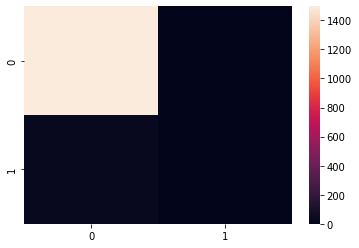

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm_pred = svm.fit(x_train_std, yy_train)
svm_pred = svm_pred.predict(x_test_std)

print("SVM classification Report:\n", classification_report(yy_test, svm_pred))
print("\n F1:\n", f1_score(yy_test, svm_pred))
print("\n Precision score is:\n", precision_score(yy_test, svm_pred))
print("\n Recall score is:\n", recall_score(yy_test, svm_pred))
sn.heatmap(confusion_matrix(yy_test, svm_pred))

### k-NN

The accuracy of the Knn classifier on training data is 98.29 %
The accuracy of the Knn classifier on test data is 98.24 %
k-NN classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1496
         1.0       0.77      0.29      0.43        34

    accuracy                           0.98      1530
   macro avg       0.88      0.65      0.71      1530
weighted avg       0.98      0.98      0.98      1530


 F1:
 0.4255319148936171

 Precision score is:
 0.7692307692307693

 Recall score is:
 0.29411764705882354


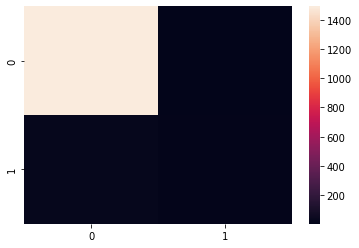

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn_pred = knn.fit(x_train_std, yy_train)
knn_pred = knn_pred.predict(x_test_std)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(x_train_std, yy_train)*100),"%")
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(x_test_std, yy_test)*100),"%")

print("k-NN classification Report:\n", classification_report(yy_test, knn_pred))
print("\n F1:\n", f1_score(yy_test, knn_pred))
print("\n Precision score is:\n", precision_score(yy_test, knn_pred))
print("\n Recall score is:\n", recall_score(yy_test, knn_pred))
sn.heatmap(confusion_matrix(yy_test, knn_pred))

### Decision Tree

The accuracy of the Decision Tree classifier on training data is 100.00 %
The accuracy of the Decision Tree classifier on test data is 97.91 %
Decision Tree classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1496
         1.0       0.53      0.59      0.56        34

    accuracy                           0.98      1530
   macro avg       0.76      0.79      0.77      1530
weighted avg       0.98      0.98      0.98      1530


 F1:
 0.5555555555555555

 Precision score is:
 0.5263157894736842

 Recall score is:
 0.5882352941176471


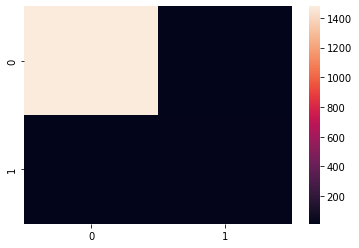

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='gini')

dt_pred = decision_tree.fit(x_train_std, yy_train)
dt_pred = dt_pred.predict(x_test_std)

print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(x_train_std, yy_train)*100),"%")
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(x_test_std, yy_test)*100),"%")

print("Decision Tree classification Report:\n", classification_report(yy_test, dt_pred))
print("\n F1:\n", f1_score(yy_test, dt_pred))
print("\n Precision score is:\n", precision_score(yy_test, dt_pred))
print("\n Recall score is:\n", recall_score(yy_test, dt_pred))
sn.heatmap(confusion_matrix(yy_test, dt_pred))

### XGBoost

The accuracy of the XGBoost classifier on training data is 98.96 %
The accuracy of the XGBoost classifier on test data is 98.37 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1496
         1.0       0.65      0.59      0.62        34

    accuracy                           0.98      1530
   macro avg       0.82      0.79      0.80      1530
weighted avg       0.98      0.98      0.98      1530


 F1:
 0.6153846153846154

 Precision score is:
 0.6451612903225806

 Recall score is:
 0.5882352941176471


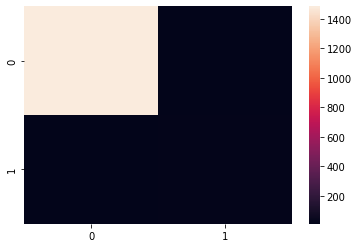

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(x_train_std, yy_train)
xgb_clf_pred = xgb_clf.predict(x_test_std)

print('The accuracy of the XGBoost classifier on training data is {:.2f}'.format(xgb_clf.score(x_train_std, yy_train)*100),"%")
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(x_test_std, yy_test)*100),"%")

print("XG Boost classification Report:\n", classification_report(yy_test, xgb_clf_pred))
print("\n F1:\n", f1_score(yy_test, xgb_clf_pred))
print("\n Precision score is:\n", precision_score(yy_test, xgb_clf_pred))
print("\n Recall score is:\n", recall_score(yy_test, xgb_clf_pred))
sn.heatmap(confusion_matrix(yy_test, xgb_clf_pred))

### Random Forest

The accuracy of the Random Forest classifier on training data is 100.00 %
The accuracy of the Random Forest classifier on test data is 98.89 %
Random Forest classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1496
         1.0       0.81      0.65      0.72        34

    accuracy                           0.99      1530
   macro avg       0.90      0.82      0.86      1530
weighted avg       0.99      0.99      0.99      1530


 F1:
 0.7213114754098361

 Precision score is:
 0.8148148148148148

 Recall score is:
 0.6470588235294118


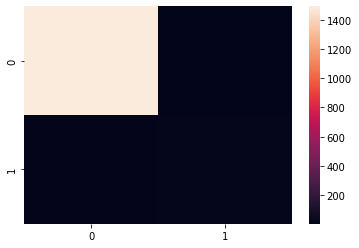

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train_std, yy_train)
r_forest_pred = random_forest.predict(x_test_std)

print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(x_train_std, yy_train)*100),"%")
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(x_test_std, yy_test)*100),"%")

print("Random Forest classification Report:\n", classification_report(yy_test, r_forest_pred))
print("\n F1:\n", f1_score(yy_test, r_forest_pred))
print("\n Precision score is:\n", precision_score(yy_test, r_forest_pred))
print("\n Recall score is:\n", recall_score(yy_test, r_forest_pred))
sn.heatmap(confusion_matrix(yy_test, r_forest_pred))

### Simulating In-Field Testing

The accuracy of the XGBoost classifier on test data is 97.66 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       492
         1.0       1.00      0.40      0.57        20

    accuracy                           0.98       512
   macro avg       0.99      0.70      0.78       512
weighted avg       0.98      0.98      0.97       512


 F1:
 0.5714285714285715

 Precision score is:
 1.0

 Recall score is:
 0.4
The accuracy of the XGBoost classifier on test data is 100.00 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       512

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of the XGBoost classifier on test data is 100.00 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       512

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of the XGBoost classifier on test data is 100.00 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       512

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of the XGBoost classifier on test data is 96.29 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       492
         1.0       0.52      0.55      0.54        20

    accuracy                           0.96       512
   macro avg       0.75      0.76      0.76       512
weighted avg       0.96      0.96      0.96       512


 F1:
 0.5365853658536585

 Precision score is:
 0.5238095238095238

 Recall score is:
 0.55
The accuracy of the XGBoost classifier on test data is 100.00 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       512

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of the XGBoost classifier on test data is 97.27 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       499
         1.0       0.00      0.00      0.00        13

    accuracy                           0.97       512
   macro avg       0.49      0.50      0.49       512
weighted avg       0.95      0.97      0.96       512


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0
The accuracy of the XGBoost classifier on test data is 96.09 %
XG Boost classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       493
         1.0       0.00      0.00      0.00        19

    accuracy                           0.96       512
   macro avg       0.48      0.50      0.49       512
weighted avg       0.93      0.96      0.94       512


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0
The accuracy of the XGBoost cl

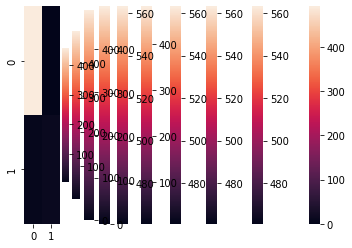

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/strem078/IAI5101_Project/main/Data/Data_Raw.csv")
import xgboost as xgb

# Preprocessing steps
df.fillna(0,inplace=True)
df['Voltage_1'] = df['Voltage_1']/5.0
df['Voltage_2'] = df['Voltage_2']/5.0
df['P_x'] = df['P_x']/(2.0/5.0*1024)
df['P_y'] = df['P_y']/(2.0/5.0*1024)
df['dPx_dV'] = df['dPx_dV']/(2.0/5.0*1024)
df['dPy_dV'] = df['dPy_dV']/(2.0/5.0*1024)
df['S1'] = (df['S1']+1)/2
df['dS1_dV'] = (df['dS1_dV']+1)/2

# Cross Validation among 10 sets
f_1 = []
precision = []
recall = []

data_sz = 512
slices = range(0,5120,data_sz)
for start in slices:
  end = start+data_sz
  x = df[df.columns[2:-4]]
  x_train = pd.concat([x[x.columns][:start], x[x.columns][end:]])
  x_test = x[x.columns][start:end]
  y_train = pd.concat([df["Mode_Locked"][:start], df["Mode_Locked"][end:]])
  y_test = df["Mode_Locked"][start:end]

  xgb_clf = xgb.XGBClassifier()
  xgb_clf = xgb_clf.fit(x_train, y_train)
  xgb_clf_pred = xgb_clf.predict(x_test)

  print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(x_test, y_test)*100),"%")

  print("XG Boost classification Report:\n", classification_report(y_test, xgb_clf_pred))
  print("\n F1:\n", f1_score(y_test, xgb_clf_pred))
  print("\n Precision score is:\n", precision_score(y_test, xgb_clf_pred))
  print("\n Recall score is:\n", recall_score(y_test, xgb_clf_pred))
  sn.heatmap(confusion_matrix(y_test, xgb_clf_pred))

# Deep Learning Using Keras

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

#Initializing our recurrent neural network

rnn = Sequential()

#Adding our first LSTM layer

rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

#Perform some dropout regularization

rnn.add(Dropout(0.2))

#Adding three more LSTM layers with dropout regularization

for i in [True, True, False]:

    rnn.add(LSTM(units = 45, return_sequences = i))

    rnn.add(Dropout(0.2))

#(Original code for the three additional LSTM layers)

# rnn.add(LSTM(units = 45, return_sequences = True))

# rnn.add(Dropout(0.2))

# rnn.add(LSTM(units = 45, return_sequences = True))

# rnn.add(Dropout(0.2))

# rnn.add(LSTM(units = 45))

# rnn.add(Dropout(0.2))

#Adding our output layer

rnn.add(Dense(units = 1))

#Compiling the recurrent neural network

rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
g = sns.countplot(df['Mode_Locked'])
g.set_xticklabels(['Negative','Positive'])
plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
LSTM = tf.keras.layers.LSTM



model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(lr=1e-4, decay=1e-6)

# Compile model
model.compile(
   loss='sparse_categorical_crossentropy',
   optimizer=optimizer,
   metrics=['accuracy'],
)

# The specification of loss=’sparse_categorical_crossentropy’ is very important here as our targets are # integers and not one-hot encoded categories.
model.fit(x_train_std,
   yy_train,
   epochs=4,
   validation_data=(x_test, y_test))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#Initializing our recurrent neural network

rnn = Sequential()

#Adding our first LSTM layer

rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_train_std.shape[1], 1)))

#Perform some dropout regularization

rnn.add(Dropout(0.2))

#Adding three more LSTM layers with dropout regularization

for i in [True, True, False]:

    rnn.add(LSTM(units = 45, return_sequences = i))

    rnn.add(Dropout(0.2))



#Adding our output layer

rnn.add(Dense(units = 1))

#Compiling the recurrent neural network

rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
rnn.fit(x_train_std, yy_train, epochs = 100, batch_size = 32)


Epoch 1/100
112/112 [==============================] - 12s 18ms/step - loss: 0.0224
Epoch 2/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0222
Epoch 3/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0223
Epoch 4/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0222
Epoch 5/100
112/112 [==============================] - 2s 17ms/step - loss: 0.0223
Epoch 6/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0222
Epoch 7/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0223
Epoch 8/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0223
Epoch 9/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0223
Epoch 10/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0222
Epoch 11/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0222
Epoch 12/100
112/112 [==============================] - 2s 17ms/step - loss: 0.0222


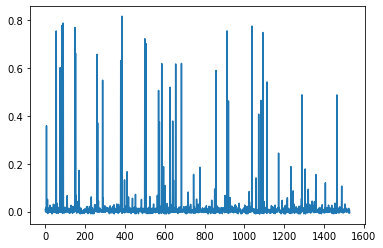

In [ ]:
predictions = rnn.predict(x_test_std)
plt.clf() #This clears the old plot from our canvas

plt.plot(predictions)